In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import random as rd
from cvxpy import *

C = 5

data = [[1, 7, -1],
        [2, 8, -1],
        [3, 8, -1],
        [5, 1, 1],
        [6, -1, 1],
        [7, 3, 1],
        ]


n = len(data)
Q = [[0] * n for _ in range(n)]
for i in range(n):
    for j in range(i, n):
        Q[i][j] = np.dot(data[i][:-1], data[j][:-1]) * data[i][-1] * data[j][-1]
        Q[j][i] = np.dot(data[i][:-1], data[j][:-1]) * data[i][-1] * data[j][-1]

#for vrstica in Q:
#    print(vrstica)

e = [1] * n
a = Variable(n)

y = [0] * n
for i in range(n):
    y[i] = data[i][-1]

obj = Minimize(1 / 2 * quad_form(a, Q) - a.T * e)

constraints = [a.T * y == 0, a >= 0, a <= C]

prob = Problem(obj, constraints)
prob.solve()
np.dot(np.array([0,0,0,0,0,1]), a.value)


matrix([[ 0.04878007]])

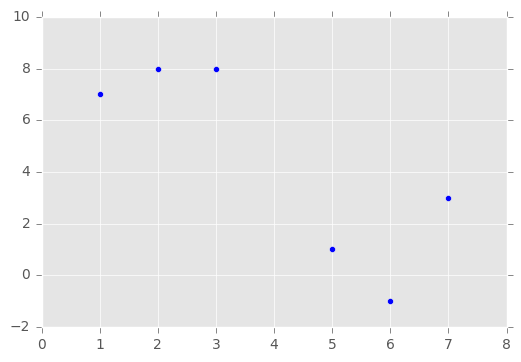

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')


data = [[1, 7],
        [2, 8],
        [3, 8],
        [5, 1],
        [6, -1],
        [7, 3],
        ]

plt.scatter([x[0] for x in data], [x[1] for x in data])
plt.show()

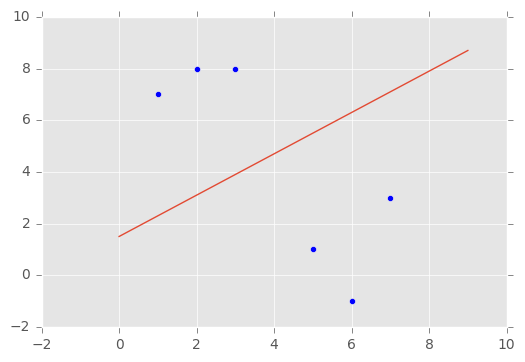

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import random as rd
from cvxpy import *

data = [[1, 7, -1],
        [2, 8, -1],
        [3, 8, -1],
        [5, 1, 1],
        [6, -1, 1],
        [7, 3, 1],
        ]


n = len(data)
m = len(data[0]) - 1
 
w = Variable(m)
b = Variable(1)

y = [0] * n
for i in range(n):
    y[i] = data[i][-1]

obj = Minimize(norm(w))

constraints = []

for i in range(n):
    constraints.append(1 - y[i] * (w.T * data[i][:-1] + b) <= 0)

prob = Problem(obj, constraints)

prob.solve()

xs = [0, 9]

plt.scatter([x[0] for x in data], [x[1] for x in data])
plt.plot(xs, [(-b.value.item() - w.value[0].item() * x)/ w.value[1].item() for x in xs])
plt.show()

In [4]:
w.T.value * np.array([[6],[-1]]) + b.value

matrix([[ 1.78048445]])

In [5]:
w.value[1].item()

-0.24390179917415053

In [4]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?', -99, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])
for i in range(len(y)):
    if y[i] == 2:
        y[i] = 1
    elif y[i] == 4:
        y[i] = -1
R = 1
        
        
n = len(X)
m = len(X[0])
 
w = Variable(m)
b = Variable(1)
e = Variable(n)


obj = Minimize(norm(w) + R * sum_entries(e))

constraints = [e >= 0]

for i in range(n):
    constraints.append(1 - e[i]- y[i] * (w.T * X[i] + b) <= 0)

prob = Problem(obj, constraints)

prob.solve()

np.squeeze(np.asarray(w.T.value))

array([-0.27661677, -0.11730968, -0.27913559, -0.13782901, -0.04969572,
       -0.02873955, -0.31822558, -0.1226792 , -0.10410854])

In [5]:
b.value



5.0167551871326541

In [6]:
X = [[1, 7],
    [2, 8],
    [3, 8],
    [5, 1],
    [6, -1],
    [7, 3],
    ]

y = [-1, -1, -1, 1, 1, 1]

R = 1
        
        
n = len(X)
m = len(X[0])
 
w = Variable(m)
b = Variable(1)
e = Variable(n)

obj = Minimize(norm(w) + R * sum_entries(e))

constraints = [e >= 0]

for i in range(n):
    constraints.append(1 - e[i]- y[i] * (w.T * X[i] + b) <= 0)
    
prob = Problem(obj, constraints)

prob.solve()
w.value

matrix([[ 0.19512209],
        [-0.24390232]])

In [33]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from cvxpy import *


def optimize(X, y, kernel="linear", C=5, d=2):

    # train to get w and b for hyperplane
    # solving optimizational problem for min ||w|| + C Sum(e_i)
    # subject to y_i (w^t x_i + b) >= 1 - e_i and e_i >= 0 for i = 1, ... , len data[0]

    n = len(X)
    m = len(X[0])

    w = Variable(m)
    b = Variable(1)
    e = Variable(n)
    a = Variable(n)
    
    
    # we have to generate matrix from X and y
    A = np.zeros(shape=(n,n))
    for i in range(n):
        for j in range(n):
            A[i][j] = np.dot(X[i], X[j])
    
    
    obj = Maximize(sum_entries(a) - 1/2 * quad_form(a, np.dot(np.dot(np.diag(y), A), np.diag(y))))

    print(obj.is_dcp())
    
    constraints = [a >= 0, e >= 0, a <= C, a.T * y == 0]

    for i in range(n):
        constraints.append(1 - e[i]- y[i] * (a.T * np.multiply(np.diag(y), A[i])  + b) <= 0)

    prob = Problem(obj, constraints)
    prob.solve()

    a = np.squeeze(np.asarray(a.T.value))
    b = b.value
    w = 0
    for i in range(n):
        w += a[i] * y[i] * X[i]
    return (a, b, w)



In [34]:
df = pd.read_csv('bezdekIris.txt', sep=",", header=None)
df.columns = ['dolzina_casnega_lista', 'sirina_casnega_lista', 'dolzina_vencnega_lista', 'sirina_vencnega_lista', 'razred' ]
df.reset_index(drop=True,inplace=True)
df.reset_index(drop=True,inplace=True)
df = df[df.razred != 'Iris-virginica']
df.replace({'Iris-setosa': 1, 'Iris-versicolor': -1,}, inplace=True)
df.drop(['dolzina_vencnega_lista', 'sirina_vencnega_lista'], 1, inplace=True)
df.reset_index(drop=True,inplace=True)

In [35]:
X = np.array(df.drop(['razred'], 1)).astype(np.float)
y = np.array(df['razred']).astype(np.float)

In [36]:
a, b, w = optimize(X, y)

True


In [38]:
a.T.shape

(100,)

NameError: name 'prob' is not defined

In [6]:
np.array([1,-1,2]) + 1

array([2, 0, 3])

In [41]:
a = np.array([2,-5,10])
X = np.array([[1,2],[2,3],[3,4]])
np.multiply(a.T, X)

ValueError: operands could not be broadcast together with shapes (3,) (3,2) 

In [54]:
def linear(x1, x2):
    return np.dot(x1, x2)

def polynomial(x1, x2, d=2):
    return (1 + np.dot(x1, x2)) ** d

def radial(x1, x2, g=100):
    return np.exp(-g * np.linalg.norm(x1 - x2))

def neural(x1, x2, k1=1, k2=1):
    return np.tanh(k1 * np.dot(x1, x2)+ k2)

x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
z1 = linear(x1, x2)
z2 = polynomial(x1, x2, d=3)
z3 = polynomial(x1, x2, d=4)
z4 = radial(x1, x2 + 3)
z5 = neural(x1, x2)

In [55]:
z4

2.1575832854563044e-226

In [57]:
def radial(x1, x2, g=100):
    return np.exp(-g * np.linalg.norm(x1 - x2))

In [58]:
h = .001  # step size in the mesh
# create a mesh to plot in
x_min, x_max = -0.2, 1.2
y_min, y_max = -0.2, 1.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

print(np.c_[xx.ravel(), yy.ravel()])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].v
Z = radial(np.c_[xx.ravel(), yy.ravel()])

[[-0.2   -0.2  ]
 [-0.199 -0.2  ]
 [-0.198 -0.2  ]
 ..., 
 [ 1.197  1.199]
 [ 1.198  1.199]
 [ 1.199  1.199]]


TypeError: radial() missing 1 required positional argument: 'x2'

In [59]:
a = np.array([[1,2],[3,4],[5,6]])
b = np.array([1,2])
a - b

array([[0, 0],
       [2, 2],
       [4, 4]])

In [60]:
np.linalg.norm(a - b, axis=1)

array([ 0.        ,  2.82842712,  5.65685425])

In [1]:
for i in range(5):
    for j in range(i):
        print(i, j)

1 0
2 0
2 1
3 0
3 1
3 2
4 0
4 1
4 2
4 3


In [4]:
a = (1, 2)
c, d = a

In [5]:
c, d

(1, 2)

In [6]:
*a

SyntaxError: can't use starred expression here (<ipython-input-6-472443b49c44>, line 1)

In [7]:
def unpack(first, *rest): 
  return first, rest

In [8]:
unpack(1,2,3,4)

(1, (2, 3, 4))

In [9]:
unpack(1, [1,2,3])

(1, ([1, 2, 3],))

In [10]:
def pack(f, s, t):
    return (f, s, t)

In [11]:
a

(1, 2)

In [12]:
c

1

In [13]:
d

2

In [15]:
pack(c, *a)
df.domain.nunique()

(1, 1, 2)

In [22]:
import pandas as pd
df = pd.read_csv('bezdekIris.txt', sep=",", header=None)
df.columns = ['dolzina_casnega_lista', 'sirina_casnega_lista', 'dolzina_vencnega_lista', 'sirina_vencnega_lista', 'razred' ]


In [23]:
df.razred.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
transformacija = dict()
for indeks, ime in enumerate(df.razred.unique()):
    transformacija[ime] = indeks * 10    
df.replace(transformacija, inplace=True)

In [25]:
df.columns

Index(['dolzina_casnega_lista', 'sirina_casnega_lista',
       'dolzina_vencnega_lista', 'sirina_vencnega_lista', 'razred'],
      dtype='object')

In [26]:
# import pandas as pd
# df = pd.read_csv('bezdekIris.txt', sep=",", header=None)
# df.columns = ['dolzina_casnega_lista', 'sirina_casnega_lista', 'dolzina_vencnega_lista', 'sirina_vencnega_lista', 'razred' ]
# df = df[df.razred != 'Iris-virginica']
# df.drop(['dolzina_vencnega_lista', 'sirina_vencnega_lista', 'razred'], 1, inplace=True)
df

,dolzina_casnega_lista,sirina_casnega_lista,dolzina_vencnega_lista,sirina_vencnega_lista,razred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [14]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from cvxpy import *
from sklearn.utils import shuffle


style.use('ggplot')

df.plot.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [28]:
df.razred.unique()

array([ 0, 10, 20])